### Just checking for some non-linear models hov they behave outside of their learned distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import warnings; warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic, ConstantKernel
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

# Define some models

In [2]:
rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
mantern = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
kernel_list = [rbf, rq, mantern]

models = {'SVR':[SVR, {'kernel':['rbf'], 'C':10.0**np.arange(-2, 2), 'epsilon':[0.1]}],
          'Neural Network':[MLPRegressor, {'activation':['relu'], 
                                           'hidden_layer_sizes':[(50,20,10,)], 
                                           'learning_rate_init':[0.1, 0.01, 0.001]}],
          'Random Forest':[RandomForestRegressor,  {'max_depth':[4,5,6]}],
          'Gradient Booster':[GradientBoostingRegressor, {'n_estimators':[50, 100]}],
          'Gaussean Process':[GaussianProcessRegressor, {'kernel':kernel_list}],
          'Regression Tree':[DecisionTreeRegressor, {'criterion':['mse','friedman_mse'], 'max_depth':[4,5,6], 'min_samples_leaf':[10,20,50]}]}

# Plot the training data as grid and the learned funtion as surface

In [7]:
def plot_2param_model(x, y, z, model):
    xy = np.array([x.flatten(), y.flatten()]).T
    clfs = GridSearchCV(models[model][0](), models[model][1], cv=3, iid=True)
    clfs.fit(xy, z.flatten())
    clf = clfs.best_estimator_
    print('Model: %s' %model)
    for k,v in clf.get_params().items():
        if k in models[model][1]:
            print("  %s: %s" %(str(k), str(v)))
    
    xx, yy = np.meshgrid(np.linspace(-2, 10, 30), np.linspace(-2, 10, 30))
    xxyy = np.array([xx.flatten(), yy.flatten()]).T
    zz = clf.predict(xxyy)
    zz = zz.reshape(xx.shape)
    
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig)
    ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap=plt.cm.RdYlGn_r, vmin=-1, vmax=1, linewidth=0., alpha=0.6)
    ax.plot_wireframe(x, y, z, rstride=1, cstride=1)
    ax.set_zlim([-2,2])
    plt.show()

In [8]:
x, y = np.meshgrid(np.linspace(0, 6, 20), np.linspace(0, 6, 20))
z = np.sin(0.7*x)*np.cos(y)

Model: SVR
  C: 1.0
  epsilon: 0.1
  kernel: rbf


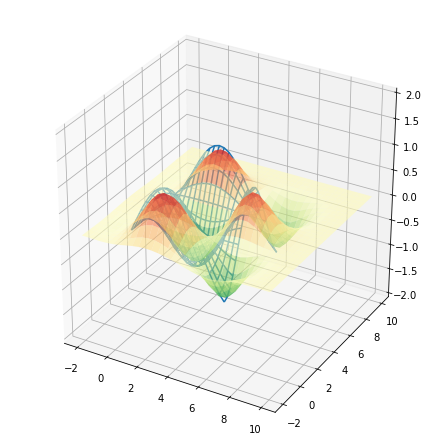

Model: Neural Network
  activation: relu
  hidden_layer_sizes: (50, 20, 10)
  learning_rate_init: 0.01


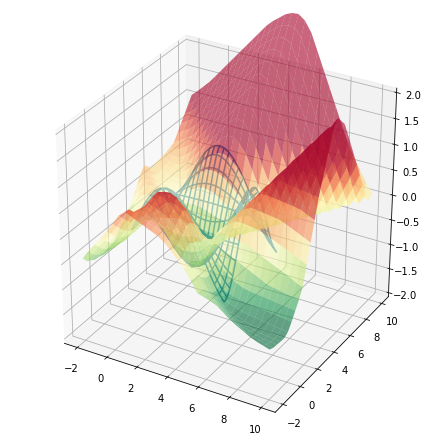

Model: Random Forest
  max_depth: 6


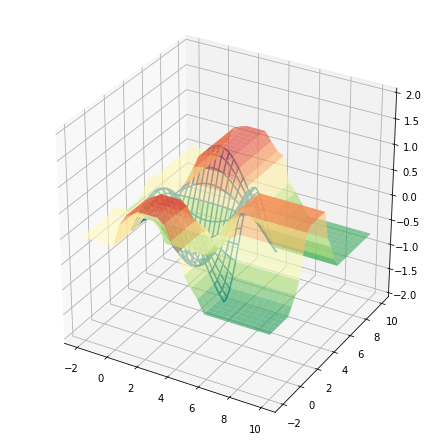

Model: Gradient Booster
  n_estimators: 100


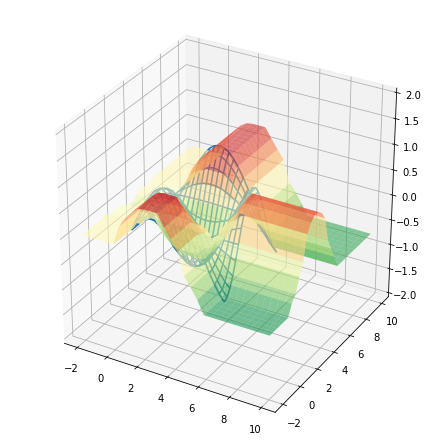

Model: Gaussean Process
  kernel: 1**2 * RBF(length_scale=1)


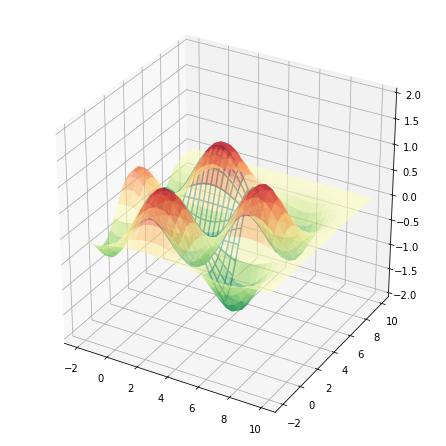

Model: Regression Tree
  criterion: mse
  max_depth: 4
  min_samples_leaf: 50


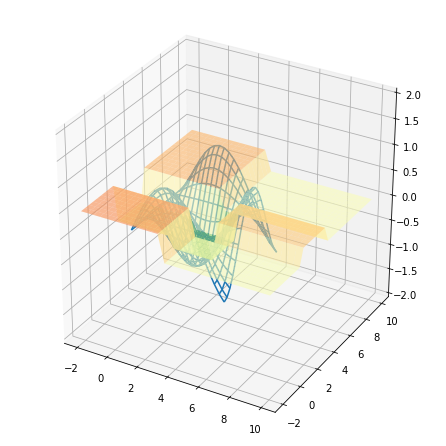

In [9]:
for model in models.keys():
    plot_2param_model(x, y, z, model)